## How to Check if Time Series Data is Stationary with Python

### [Reference](https://machinelearningmastery.com/time-series-data-stationary-python/)

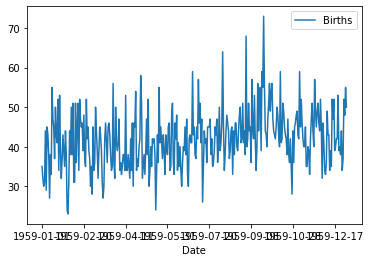

In [3]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', 
                  header=0, 
                  index_col=0)
series.plot()
pyplot.show()

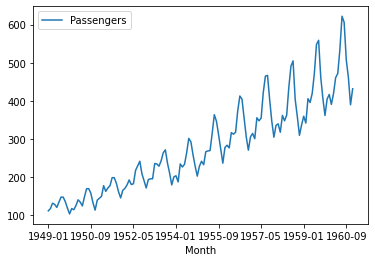

In [2]:
series = read_csv('international-airline-passengers.csv', 
                  header=0, 
                  index_col=0)
series.plot()
pyplot.show()

#### Augmented Dickey-Fuller test
- `p-value > 0.05`: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- `p-value <= 0.05`: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [4]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('daily-total-female-births.csv', 
                  header=0, 
                  index_col=0, 
                  squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [5]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Let’s log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.

In [6]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
series = read_csv('international-airline-passengers.csv', header=0, index_col=0, squeeze=True)
X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579
